In [18]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
import tf_keras as keras 
from keras import layers,models

import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

import numpy as np


In [19]:
print(tf.__version__)

2.18.0


In [84]:
data_frame_cat = pd.read_excel('./data/categorias.xlsx')
data_frame_cat = data_frame_cat.drop(data_frame_cat.columns[0], axis=1)
data_frame_numpy = pd.read_excel('./data/resultados.xlsx')
data_frame_numpy = data_frame_numpy.drop(data_frame_numpy.columns[0], axis=1)


In [85]:

def normalizar_sequencia(sequencia):
    sequencia = np.array(sequencia)  # Garantir que seja um array
    min_val = sequencia.min()  # Valor mínimo da sequência
    max_val = sequencia.max()  # Valor máximo da sequência

    if max_val != min_val:
        return np.array((sequencia - min_val) / (max_val - min_val))
    else:
        return np.ones_like(sequencia)
    
data_frame_numpy_normalized = data_frame_numpy.apply(lambda row: normalizar_sequencia(row))

data_frame_numpy = data_frame_numpy_normalized.to_numpy()
data_frame_cat = data_frame_cat.to_numpy()


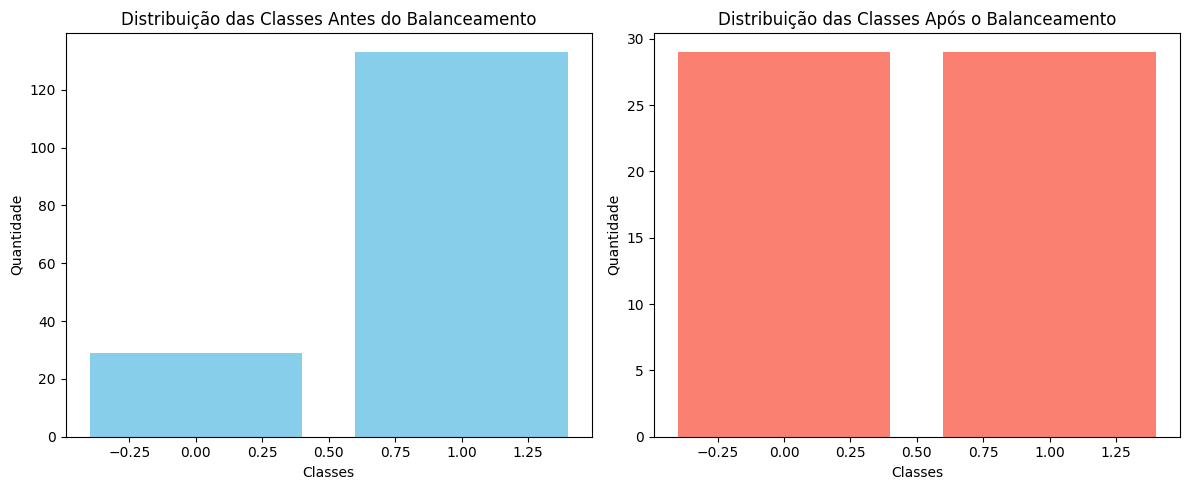

In [88]:
# Inicialização do RandomUnderSampler

# Garantir que os rótulos estejam em um array unidimensional
data_frame_cat = np.array(data_frame_cat).flatten()

# Contagem antes do balanceamento
counter_before = Counter(data_frame_cat)

# Aplicando RandomUnderSampler para balanceamento
rus = RandomUnderSampler(random_state=120)
train_images_balance_s_temp, train_labels_balance_s_temp = rus.fit_resample(data_frame_numpy, data_frame_cat)

# Contagem após o balanceamento
counter_after = Counter(train_labels_balance_s_temp)

# Visualizando o balanceamento com gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de contagem antes do balanceamento
axes[0].bar(counter_before.keys(), counter_before.values(), color='skyblue')
axes[0].set_title("Distribuição das Classes Antes do Balanceamento")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Quantidade")

# Gráfico de contagem após o balanceamento
axes[1].bar(counter_after.keys(), counter_after.values(), color='salmon')
axes[1].set_title("Distribuição das Classes Após o Balanceamento")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Quantidade")

plt.tight_layout()
plt.show()

In [89]:
dimensao=(-1,16,16,1)
train_images_balance_s_temp=train_images_balance_s_temp.reshape(dimensao)
print(train_images_balance_s_temp.shape)
print(train_labels_balance_s_temp.shape)


(58, 16, 16, 1)
(58,)


In [90]:

data_images, valida_images, data_labels, valida_labels = train_test_split(train_images_balance_s_temp, train_labels_balance_s_temp, shuffle=True, random_state=10, train_size=0.8)

train_images, teste_images, train_labels, teste_labels = train_test_split(data_images, data_labels, shuffle=True, random_state=10, train_size=0.8)

print(valida_images.shape)
print(data_images.shape)
print(train_images.shape)
print(teste_images.shape)

(12, 16, 16, 1)
(46, 16, 16, 1)
(36, 16, 16, 1)
(10, 16, 16, 1)


[1 0 0 1 0 0 1 0 1 0]


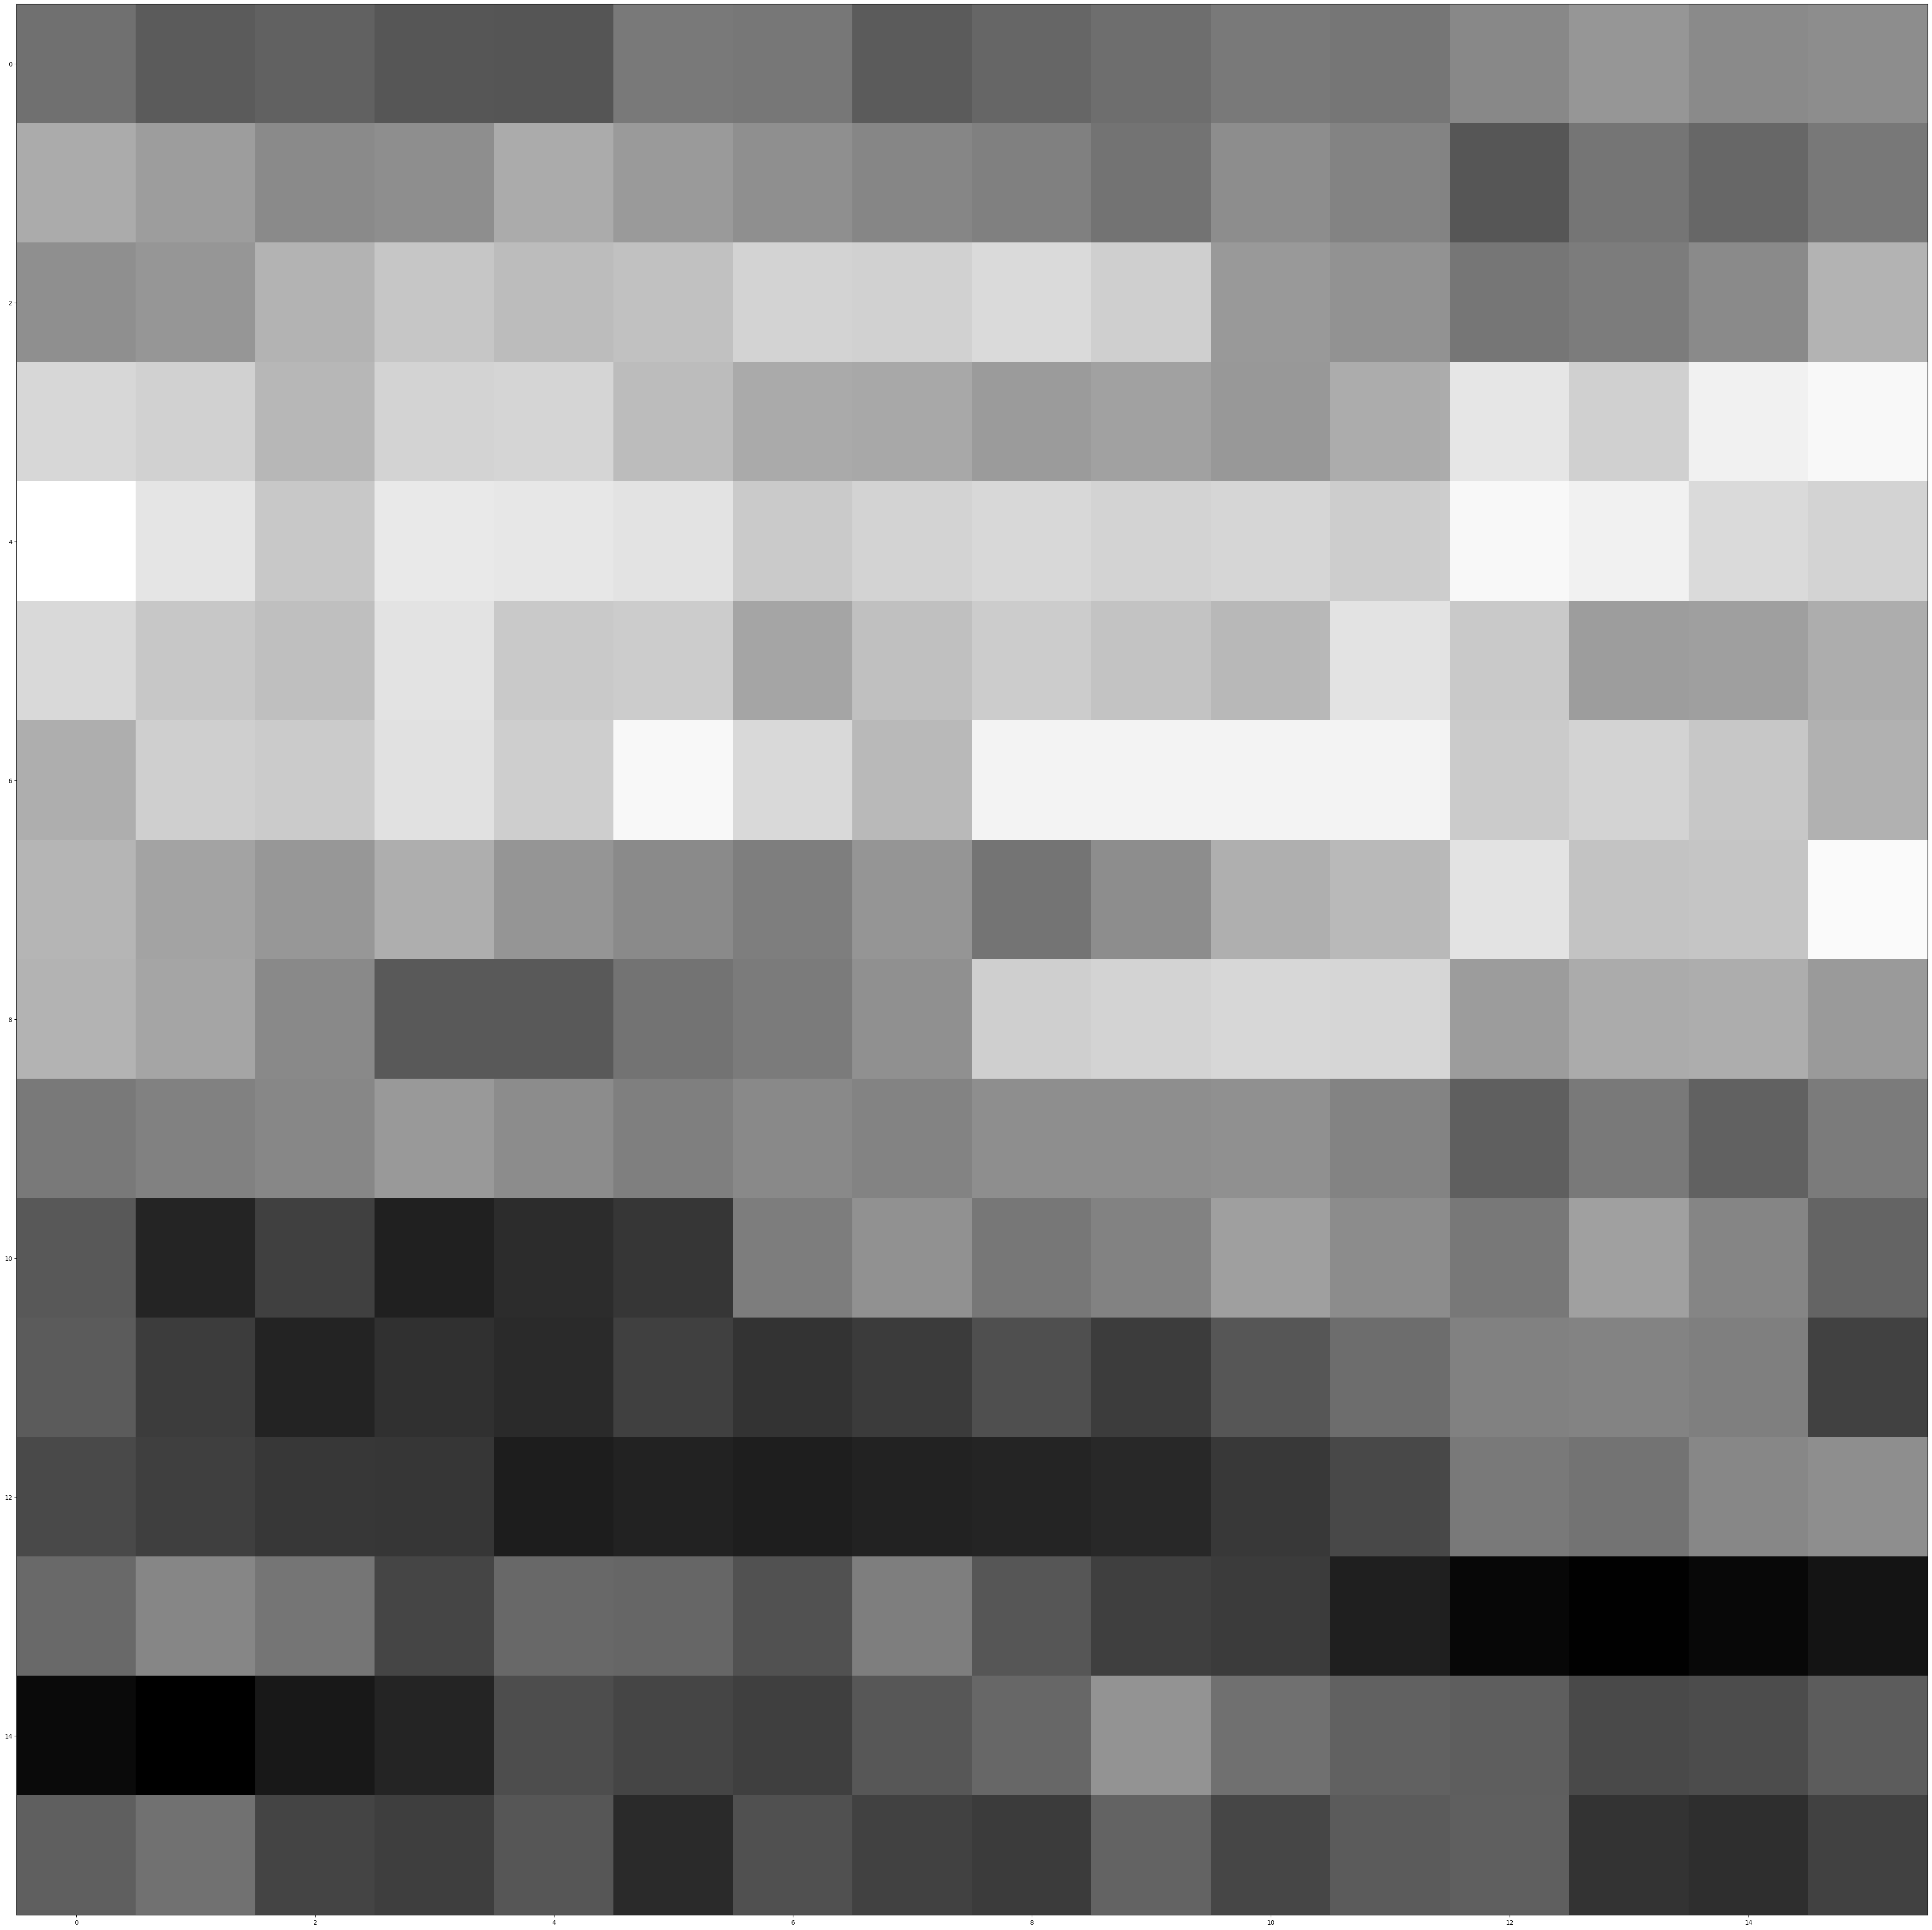

In [91]:
print(teste_labels)
fig ,ax= plt.subplots(1, figsize=(56, 56))
plt.imshow(teste_images[3],cmap="gray")


In [111]:

model = models.Sequential()

# Camada Input para imagens de 16x16 com 1 canal (escala de cinza)
model.add(layers.Input(shape=(16, 16, 1)))

# Camada convolucional 2D
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Outra camada convolucional 2D
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.3))


model.add(layers.Flatten())

# Camada densa
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(128, activation='relu'))

# Camada de saída (2 classes para classificação binária)
model.add(layers.Dense(2, activation='softmax'))  # softmax para classificação multi-classe

# Compilando o modelo
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


Here's the complete architecture of your model:

In [47]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,824 (1.72 MB)

 Trainable params: 150,274 (587.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 300,550 (1.15 MB)

In [112]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=300,
                    validation_data=(teste_images, teste_labels))



Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 410ms/step - accuracy: 0.4421 - loss: 0.6950 - val_accuracy: 0.6000 - val_loss: 0.6939
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5579 - loss: 0.6888 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6157 - loss: 0.6833 - val_accuracy: 0.4000 - val_loss: 0.6989
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5868 - loss: 0.6788 - val_accuracy: 0.4000 - val_loss: 0.7029
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5579 - loss: 0.6737 - val_accuracy: 0.3000 - val_loss: 0.7055
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5764 - loss: 0.6758 - val_accuracy: 0.4000 - val_loss: 0.7076
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6736 - loss: 0.6648 - val_accuracy: 0.4000 - val_loss: 0.7103
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6343 - loss: 0.6626 - val_accuracy: 0.4000 - val_loss

In [110]:
y_pred=model.predict(teste_images)
y_pred_max = np.argmax(y_pred, axis=1)

print(y_pred_max)
print(teste_labels)
print(classification_report(teste_labels, y_pred_max))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[1 1 1 1 1 0 0 0 1 0]
[1 0 0 1 0 0 1 0 1 0]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10



In [114]:
y_pred=model.predict(valida_images)
y_pred_max = np.argmax(y_pred, axis=1)

print(y_pred_max)
print(valida_labels)
print(classification_report(valida_labels, y_pred_max))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
[0 0 0 0 1 0 0 1 0 0 0 1]
[1 0 1 0 0 0 1 0 0 0 1 1]
              precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.33      0.20      0.25         5

    accuracy                           0.50        12
   macro avg       0.44      0.46      0.44        12
weighted avg       0.46      0.50      0.47        12



### Evaluate the model

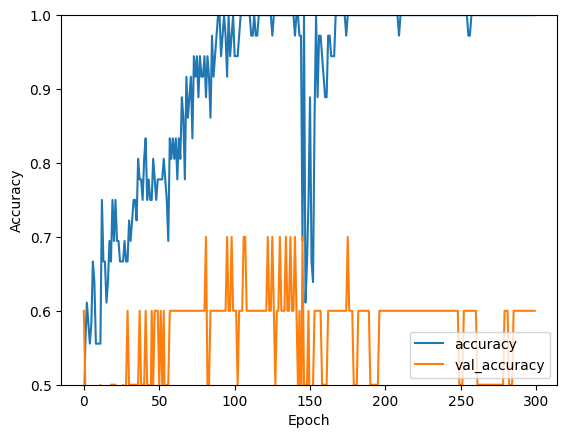

In [115]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [31]:
test_loss, test_acc = model.evaluate(teste_images,  teste_labels, verbose=2)
print(test_acc)

1/1 - 0s - 33ms/step - accuracy: 0.5000 - loss: 0.9535
0.5


In [32]:
test_loss, test_acc = model.evaluate(teste_images,  teste_labels, verbose=2)
print(test_acc)


1/1 - 0s - 46ms/step - accuracy: 0.5000 - loss: 0.9535
0.5
